In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [301]:
df= pd.read_csv('train_loan.csv')  # Read the dataset to the python environment.
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


The dataset is a loan dataset and it consists of 614 entries and 13 features.

# Data Analysis

In [302]:
df.shape      # It specifically gives the number of rows and columns in the dataset

(614, 13)

In [303]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [304]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


 We can note here that there are missing values in the dataset

In [306]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


This will give a statistical summary of count, mean, standard deviation, minimum value of each column also maximum, 25%, 50% and 75% percentile for the dataset

In [307]:
df.isna().sum() # This will find out the null values present in each column of the dataset

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

It is clear there are  missing values in the dataset for features Gender, Married, Dependents,Self_Employed, Loan Amount, Loan_Amount_Term and Credit_History

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Exploratory Data Analysis

In [309]:
num_cols=[columns for columns in df.columns if df[columns].dtype !='O'] 
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

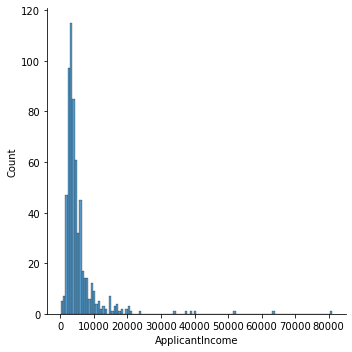

In [310]:
sns.displot(df['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncome'>

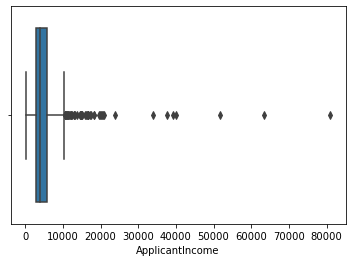

In [311]:
sns.boxplot(x=df['ApplicantIncome'])

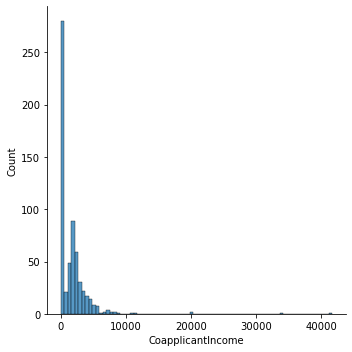

In [312]:
sns.displot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome'>

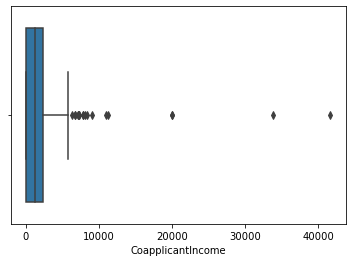

In [313]:
sns.boxplot(x=df['CoapplicantIncome'])

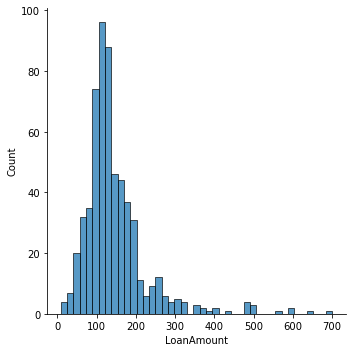

In [314]:
sns.displot(df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount'>

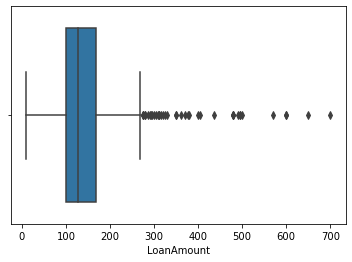

In [315]:
sns.boxplot(x=df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

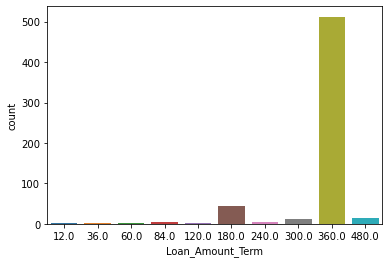

In [316]:
sns.countplot(x='Loan_Amount_Term',data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

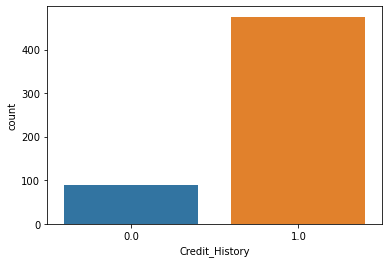

In [317]:
sns.countplot(x='Credit_History',data=df)

<AxesSubplot:>

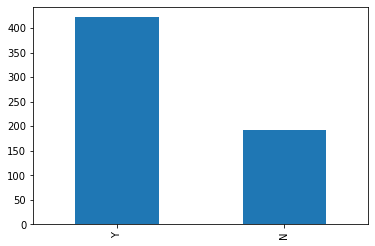

In [318]:
df['Loan_Status'].value_counts(normalize=True) 
df['Loan_Status'].value_counts().plot.bar()

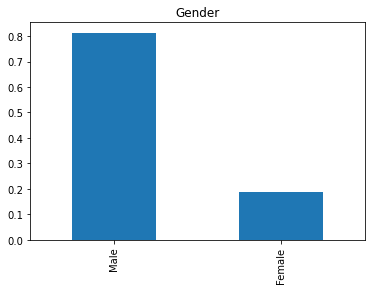

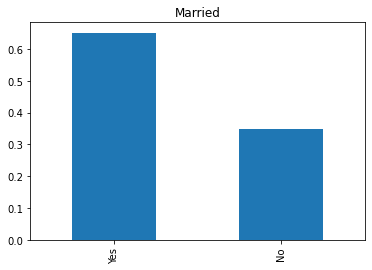

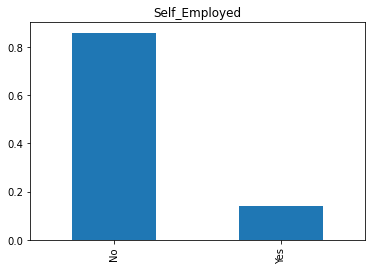

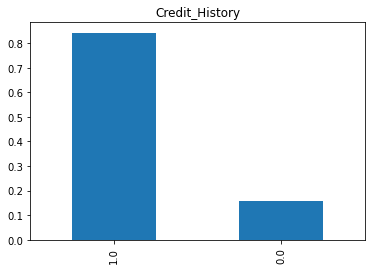

In [319]:
df['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()
df['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

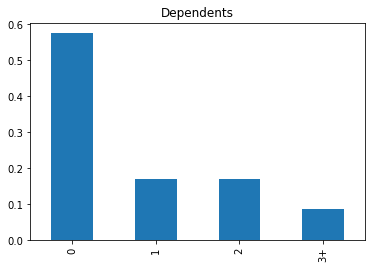

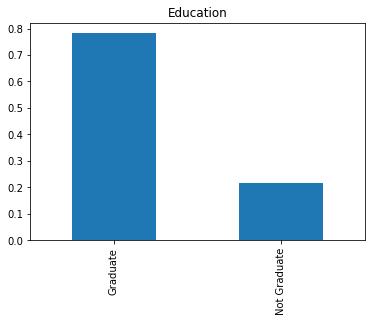

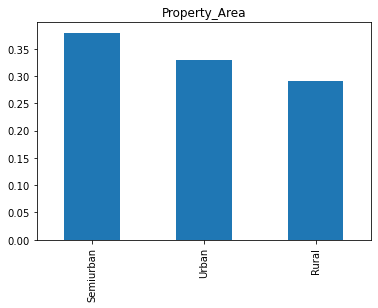

In [320]:
df['Dependents'].value_counts(normalize=True).plot.bar( title='Dependents')
plt.show()
df['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
df['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

From the above bar plots it is clear that most of the applicants don't have dependents,around 80% of the applicants are graduate and the property of most of the applicants is in semiurban area.

BIVARIATE ANALYSIS

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

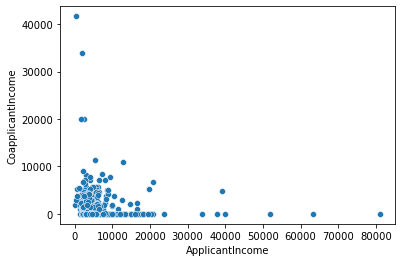

In [321]:
sns.scatterplot(df['ApplicantIncome'],df['CoapplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

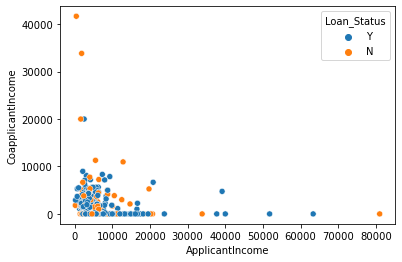

In [322]:
sns.scatterplot(df['ApplicantIncome'],df['CoapplicantIncome'],hue=df['Loan_Status'])

Based on the dataset given ,more number of applicant and Coapplicant income are very less in number. Loan is approved where applicant and coapplicant income is less in number

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

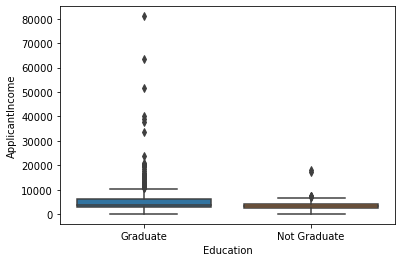

In [323]:
sns.boxplot(x='Education',y='ApplicantIncome',data=df)

Analysing the education level vs Applicantincome it can be inferred that applicant with higher education have higer income.

# PREPROCESSING

MISSING VALUE TREATMENT

In [324]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.

We can treat the missing values in all the features one by one.

For numerical variables: imputation using mean or median
For categorical variables: imputation using mode

In [325]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [326]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

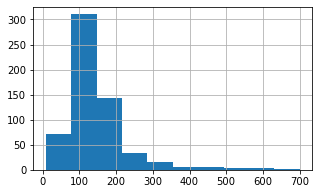

In [327]:
df['LoanAmount'].hist(figsize=(5,3))
plt.show()

In [328]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [329]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

No more missing values in the dataset

## OUTLIER HANDLING AND ENCODING

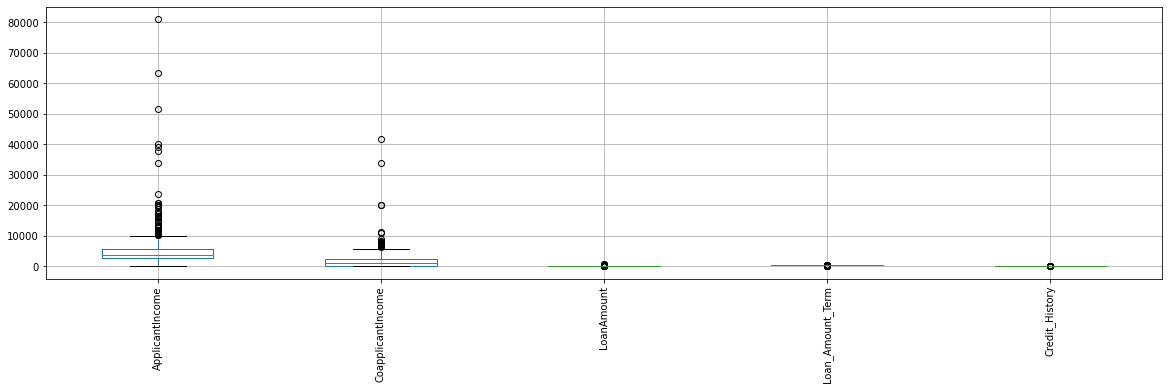

In [330]:
# boxplot before removing the outliers
plt.figure(figsize = (20,5))
df.boxplot()
plt.xticks(rotation = 90)
plt.show()

In [331]:
df.drop('Loan_ID',axis =1,inplace =True)  # Feature reduction as Loan_ID is less significant

In [332]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [333]:
df['Dependents'].replace('3+','3',inplace=True)
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [334]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])

In [335]:
num_cols=[columns for columns in df.columns if df[columns].dtype !='O']
num_cols

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [336]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df['Loan_Amount_Term'] = le.fit_transform(df['Loan_Amount_Term'])

In [337]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,8,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,8,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,8,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,8,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,8,1.0,2,1


In [338]:
X = df.drop('Loan_Status',axis =1)
y =df['Loan_Status']

In [339]:
X['ApplicantIncome'] = np.log(X['ApplicantIncome']) #log transformation
X['LoanAmount'] = np.log(X['LoanAmount'])

In [340]:
from sklearn.preprocessing import StandardScaler  # Scaling using standard scalar
sc_X = StandardScaler()
X['ApplicantIncome'] = sc_X.fit_transform(X[['ApplicantIncome']]) 
X['CoapplicantIncome'] = sc_X.fit_transform(X[['CoapplicantIncome']]) 
X['LoanAmount'] =sc_X.fit_transform(X[['LoanAmount']])

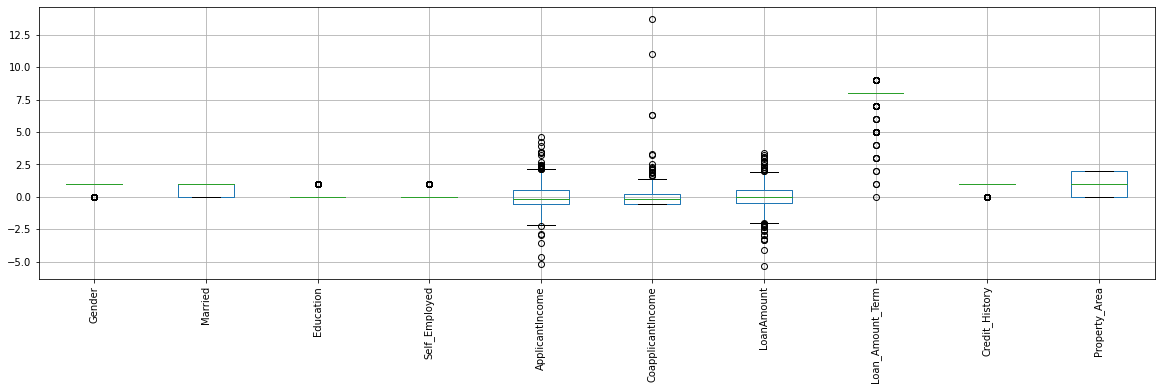

In [341]:
plt.figure(figsize = (20,5))
X.boxplot()
plt.xticks(rotation = 90)
plt.show()

When dealing with continuous features, we easily come across the situation where the scale of each feature is different.In order to make sure that large-scale features don't dominate other feature, we need to perform feature scaling.Also,as we take the log transformation, it does not affect the smaller values much but reduces the larger values. So, we get a distribution similar to normal distribution.

No features are highly correlated to each other

In [342]:
#splitting data
X=df.drop('Loan_Status', axis=1)
y=df['Loan_Status']

In [343]:
X=pd.DataFrame(X)
X.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.218241,0.133550,5403.459283,1621.245798,145.752443,7.667752,0.855049,1.037459
std,0.386497,0.476373,0.413389,0.340446,6109.041673,2926.248369,84.107233,1.109224,0.352339,0.787482
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,8.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,8.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,8.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,9.000000,1.000000,2.000000


In [344]:
#spliting into test and train data set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

# ENSEMBLE MODELING WITH HYPERPARAMETER TUNING

## RANDOM FOREST CLASSIFIER

In [345]:
## random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [346]:
rf = RandomForestClassifier(random_state=40)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 40,
 'verbose': 0,
 'warm_start': False}

In [347]:
params_rf = {'n_estimators': [500, 800, 1000],
             'max_depth': [8, 16, 32],           
             'max_features': ['log2', 'sqrt']}

In [348]:
from sklearn.model_selection import GridSearchCV

In [349]:
grid_rf = GridSearchCV(estimator=rf,                        
                       param_grid=params_rf,                         
                       cv=3,                        
                       scoring='accuracy',           
                           
                       n_jobs=-1)

In [350]:
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=40), n_jobs=-1,
             param_grid={'max_depth': [8, 16, 32],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [500, 800, 1000]},
             scoring='accuracy')

In [351]:
# Extract best hyperparameters from 'grid_dt' 
best_hyperparams = grid_rf.best_params_
print('Best hyerparameters:\n', best_hyperparams)

Best hyerparameters:
 {'max_depth': 8, 'max_features': 'log2', 'n_estimators': 500}


In [352]:
# Extract best CV score from 'grid_dt' 
best_CV_score = grid_rf.best_score_ 
print(best_CV_score)

0.8085440670357625


In [353]:
# Extract best model from 'grid_dt' 
best_model = grid_rf.best_estimator_
best_model

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=500,
                       random_state=40)

In [ ]:
VOTING CLASSIFIER

The VotingClassifier can also be used together with GridSearchCV in order to tune the hyperparameters of the individual estimators

In [354]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='soft')

params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200]}
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(X_train,y_train)

In [355]:
predictions =grid.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



In [235]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='soft')
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='soft', weights=[2,5,1])
params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200]}
grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(X_train,y_train)
predictions =grid.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



## BAGGING CLASSIFIER

In [356]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
bag_model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=50))
bag_model.fit(X_train, y_train)
bag_model.score(X_test,y_test)

0.7398373983739838

In [357]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [358]:
predictions=grid_search_cv.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [359]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=2, random_state=42)

## GRADIENT BOOST CLASSIFIER

In [360]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(max_depth=10, n_estimators=400, random_state=123)
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
gb.score(X_test,y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.44      0.54        43
           1       0.75      0.89      0.81        80

    accuracy                           0.73       123
   macro avg       0.71      0.66      0.67       123
weighted avg       0.72      0.73      0.71       123



In [361]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
max_depth=10.0, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.7560975609756098

## ADA BOOST CLASSIFIER

In [362]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(random_state=1)
ada_model.fit(X_train, y_train)
ada_model.score(X_test,y_test)

0.7317073170731707

In [363]:
predictions =ada_model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.40      0.51        43
           1       0.74      0.91      0.82        80

    accuracy                           0.73       123
   macro avg       0.72      0.65      0.66       123
weighted avg       0.73      0.73      0.71       123



In [364]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=11,
                       n_informative=2, n_redundant=0,
                         random_state=0, shuffle=False)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7560975609756098

In [365]:
ada_model.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 1}

In [366]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=11,
                       n_informative=2, n_redundant=0,
                         random_state=1, shuffle=False)
clf = AdaBoostClassifier(n_estimators=100, random_state=0,learning_rate=0.05)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7886178861788617

with  hyperparameter tuning random forest algorithm gave the good result